In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 01')
df3 = pd.read_excel (xls,'Table 03')

In [6]:
df3

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,Unnamed: 9
0,2021,September,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1,NaN
1,2021,September,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,NaN
2,2021,September,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,NaN
3,2021,September,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,NaN
4,2021,September,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1,NaN
...,...,...,...,...,...,...,...,...,...,...
323092,2012,September,Yarriambiack,3489,Tempy,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1,NaN
323093,2012,September,Yarriambiack,3489,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A711 FV Stalking,1,NaN
323094,2012,September,Yarriambiack,3489,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1,NaN
323095,2012,September,Yarriambiack,3489,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2,NaN


In [7]:
lga = df3.groupby(['Local Government Area'])['Incidents Recorded'].agg('sum')

#LGAgroup = df3[df3['Police Region']=='1 North West Metro']

lga

Local Government Area
Alpine            3470
Ararat            9163
Ballarat         83052
Banyule          67409
Bass Coast       19286
                 ...  
Wodonga          25057
Wyndham         115195
Yarra           103336
Yarra Ranges     56318
Yarriambiack      2972
Name: Incidents Recorded, Length: 79, dtype: int64

In [8]:
df.head(20)

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,5666,4310.779038
1,2021,September,1 North West Metro,Brimbank,13161,6488.330843
2,2021,September,1 North West Metro,Darebin,10191,6180.887689
3,2021,September,1 North West Metro,Hobsons Bay,4473,4594.609322
4,2021,September,1 North West Metro,Hume,13396,5455.211528
5,2021,September,1 North West Metro,Maribyrnong,6903,7349.535480
6,2021,September,1 North West Metro,Melbourne,24508,14633.717469
7,2021,September,1 North West Metro,Melton,9060,5038.406836
8,2021,September,1 North West Metro,Moonee Valley,5860,4480.437518
9,2021,September,1 North West Metro,Moreland,9449,5052.578902


In [9]:
df["Total Population"] = (df["Incidents Recorded"] / df["Rate per 100,000 population"] * 100000).round()
df

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population",Total Population
0,2021,September,1 North West Metro,Banyule,5666,4310.779038,131438.0
1,2021,September,1 North West Metro,Brimbank,13161,6488.330843,202841.0
2,2021,September,1 North West Metro,Darebin,10191,6180.887689,164879.0
3,2021,September,1 North West Metro,Hobsons Bay,4473,4594.609322,97353.0
4,2021,September,1 North West Metro,Hume,13396,5455.211528,245563.0
...,...,...,...,...,...,...,...
865,2012,September,4 Western,Total,51566,5643.659065,913698.0
866,2012,September,Justice Institutions and Immigration Facilities,Justice Institutions and Immigration Facilities,801,NaN,NaN
867,2012,September,Justice Institutions and Immigration Facilities,Total,801,NaN,NaN
868,2012,September,Unincorporated Vic,Unincorporated Vic,106,NaN,NaN


In [10]:
NorthWestMetro = df[df['Police Region']=='1 North West Metro']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Total Population'].agg('sum')
NorthWestMetro

Year
2012    3593876.0
2013    3713220.0
2014    3832924.0
2015    3955406.0
2016    4096012.0
2017    4244094.0
2018    4383814.0
2019    4515594.0
2020    4611848.0
2021    4591080.0
Name: Total Population, dtype: float64

In [11]:
Eastern = df[df['Police Region']=='2 Eastern']
Eastern= Eastern.groupby(['Year'])['Total Population'].agg('sum')
Eastern

Year
2012    3146322.0
2013    3183376.0
2014    3220464.0
2015    3260488.0
2016    3310048.0
2017    3357298.0
2018    3398508.0
2019    3439582.0
2020    3469862.0
2021    3445041.0
Name: Total Population, dtype: float64

In [12]:
SouthernMetro = df[df['Police Region']=='3 Southern Metro']
SouthernMetro = SouthernMetro.groupby(['Year'])['Total Population'].agg('sum')
SouthernMetro

Year
2012    2732994.0
2013    2793918.0
2014    2857738.0
2015    2924706.0
2016    3003360.0
2017    3076924.0
2018    3148066.0
2019    3214514.0
2020    3258990.0
2021    3244711.0
Name: Total Population, dtype: float64

In [13]:
Western = df[df['Police Region']=='4 Western']
Western = Western.groupby(['Year'])['Total Population'].agg('sum')
Western

Year
2012    1827396.0
2013    1853208.0
2014    1877038.0
2015    1902320.0
2016    1935140.0
2017    1963098.0
2018    1991872.0
2019    2022308.0
2020    2050852.0
2021    2074686.0
Name: Total Population, dtype: float64

In [14]:
Justice = df[df['Police Region']=='Justice Institutions and Immigration Facilities']
Justice = Justice.groupby(['Year'])['Total Population'].agg('sum')
Justice

Year
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
Name: Total Population, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

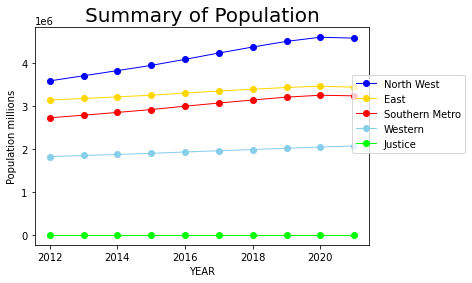

In [15]:
x = np.arange(2012,2022,1)
plt.plot(x,NorthWestMetro, marker="o", color="blue", linewidth=1, label="North West")
plt.plot(x,Eastern, marker="o", color="gold", linewidth=1, label="East")
plt.plot(x,SouthernMetro, marker="o", color="red", linewidth=1, label="Southern Metro")
plt.plot(x,Western, marker="o", color="skyblue", linewidth=1, label="Western")
plt.plot(x,Justice, marker="o", color="lime", linewidth=1, label="Justice")
plt.title("Summary of Population",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Population millions")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.4))
plt.show

## ANALYSIS OF "INCIDENTS RECORDED" OVER 10 YEARS FOR EACH POLICE REGION

In [16]:
c = df.loc[df['Local Government Area']=='Total',['Year','Police Region','Incidents Recorded']]
c

,Year,Police Region,Incidents Recorded
14,2021,1 North West Metro,136145
40,2021,2 Eastern,81340
51,2021,3 Southern Metro,80847
82,2021,4 Western,58217
84,2021,Justice Institutions and Immigration Facilities,1093
86,2021,Unincorporated Vic,65
101,2020,1 North West Metro,158686
127,2020,2 Eastern,91063
138,2020,3 Southern Metro,98068
169,2020,4 Western,62947


In [17]:
cdf = c.groupby('Year')['Incidents Recorded'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

,sum,mean,median,var,std
Year,,,,,
2012,331830,55305.000000,60547.5,2.590126e+09,50893.276031
2013,336015,56002.500000,62189.0,2.530241e+09,50301.498565
2014,345776,57629.333333,64486.0,2.742332e+09,52367.282281
2015,359331,59888.500000,66401.5,2.931297e+09,54141.457759
2016,410419,68403.166667,76448.5,3.752311e+09,61256.107596
2017,389897,64982.833333,75146.0,3.230197e+09,56834.822577
2018,382777,63796.166667,71496.5,3.271865e+09,57200.221546
2019,396299,66049.833333,76125.5,3.358553e+09,57953.021597
2020,412152,68692.000000,77005.0,3.748719e+09,61226.784985


In [18]:
Total = c.groupby(['Year'])['Incidents Recorded'].agg('sum')
Total.describe()

count        10.000000
mean     372220.300000
std       29954.865667
min      331830.000000
25%      348758.750000
50%      371054.000000
75%      394698.500000
max      412152.000000
Name: Incidents Recorded, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

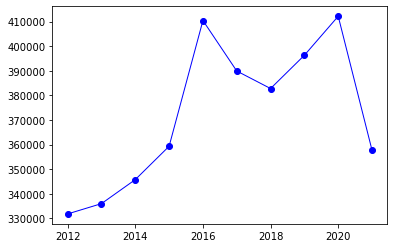

In [19]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total")
plt.show

In [20]:
NorthWestMetro = c[c['Police Region']=='1 North West Metro']
del NorthWestMetro['Police Region']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Incidents Recorded'].agg('sum')
NorthWestMetro

Year
2012    134869
2013    131611
2014    137684
2015    141935
2016    160143
2017    147426
2018    150357
2019    150072
2020    158686
2021    136145
Name: Incidents Recorded, dtype: int64

In [21]:
Eastern = c[c['Police Region']=='2 Eastern']
del Eastern['Police Region']
Eastern= Eastern.groupby(['Year'])['Incidents Recorded'].agg('sum')
Eastern

Year
2012    69529
2013    71682
2014    75408
2015    76300
2016    86938
2017    86012
2018    82213
2019    88545
2020    91063
2021    81340
Name: Incidents Recorded, dtype: int64

In [22]:
SouthernMetro = c[c['Police Region']=='3 Southern Metro']
del SouthernMetro['Police Region']
SouthernMetro = SouthernMetro.groupby(['Year'])['Incidents Recorded'].agg('sum')
SouthernMetro

Year
2012    74959
2013    78938
2014    78266
2015    83761
2016    96333
2017    90671
2018    87843
2019    92444
2020    98068
2021    80847
Name: Incidents Recorded, dtype: int64

In [23]:
Western = c[c['Police Region']=='4 Western']
del Western['Police Region']
Western = Western.groupby(['Year'])['Incidents Recorded'].agg('sum')
Western

Year
2012    51566
2013    52696
2014    53564
2015    56503
2016    65959
2017    64280
2018    60780
2019    63706
2020    62947
2021    58217
Name: Incidents Recorded, dtype: int64

In [24]:
Justice = c[c['Police Region']=='Justice Institutions and Immigration Facilities']
del Justice['Police Region']
Justice = Justice.groupby(['Year'])['Incidents Recorded'].agg('sum')
Justice

Year
2012     801
2013    1019
2014     757
2015     738
2016     931
2017    1395
2018    1489
2019    1438
2020    1328
2021    1093
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

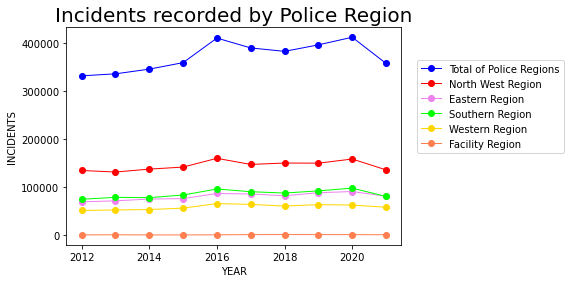

In [25]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total of Police Regions")
plt.plot(x,NorthWestMetro, marker="o", color="red", linewidth=1, label="North West Region")
plt.plot(x,Eastern, marker="o", color="violet", linewidth=1, label="Eastern Region")
plt.plot(x,SouthernMetro, marker="o", color="lime", linewidth=1, label="Southern Region")
plt.plot(x,Western, marker="o", color="gold", linewidth=1, label="Western Region")
plt.plot(x,Justice, marker="o", color="coral", linewidth=1, label="Facility Region")
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.4))
plt.title("Incidents recorded by Police Region",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("INCIDENTS")
#plt.figure(figsize=(800,600))
plt.show

Most crime is taking place in the North West Region. Further Analysis into this region below:

In [26]:
nw = df.loc[df['Police Region']=='1 North West Metro',['Local Government Area','Year','Incidents Recorded','Rate per 100,000 population']]
nw

,Local Government Area,Year,Incidents Recorded,"Rate per 100,000 population"
0,Banyule,2021,5666,4310.779038
1,Brimbank,2021,13161,6488.330843
2,Darebin,2021,10191,6180.887689
3,Hobsons Bay,2021,4473,4594.609322
4,Hume,2021,13396,5455.211528
...,...,...,...,...
793,Nillumbik,2012,1467,2330.976404
794,Whittlesea,2012,9736,5727.294653
795,Wyndham,2012,10980,6129.592310
796,Yarra,2012,9274,11411.625732


In [27]:
Banyulenw = nw.loc[nw['Local Government Area']==' Banyule',:]
del Banyulenw['Local Government Area']
inBanyulenw = Banyulenw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateBanyulenw = Banyulenw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateBanyulenw)

Year
2012    4888.982393
2013    4775.005229
2014    5449.735027
2015    5578.643487
2016    5707.470556
2017    5777.020486
2018    5528.598848
2019    5379.823762
2020    5227.376080
2021    4310.779038
Name: Rate per 100,000 population, dtype: float64


In [28]:
Brimbanknw = nw.loc[nw['Local Government Area']==' Brimbank',:]
del Brimbanknw['Local Government Area']
inBrimbanknw = Brimbanknw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateBrimbanknw = Brimbanknw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateBrimbanknw)

Year
2012    7718.785802
2013    7891.664840
2014    6902.372171
2015    7325.500349
2016    7527.792742
2017    6423.764596
2018    6944.391216
2019    6923.289815
2020    7748.010776
2021    6488.330843
Name: Rate per 100,000 population, dtype: float64


In [29]:
Darebinnw = nw.loc[nw['Local Government Area']==' Darebin',:]
del Darebinnw['Local Government Area']
inDarebinnw = Darebinnw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateDarebinnw = Brimbanknw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateDarebinnw)

Year
2012    7718.785802
2013    7891.664840
2014    6902.372171
2015    7325.500349
2016    7527.792742
2017    6423.764596
2018    6944.391216
2019    6923.289815
2020    7748.010776
2021    6488.330843
Name: Rate per 100,000 population, dtype: float64


In [30]:
HobsonsBaynw = nw.loc[nw['Local Government Area']==' Hobsons Bay',:]
del HobsonsBaynw['Local Government Area']
inHobsonsBaynw = HobsonsBaynw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateHobsonsBaynw = HobsonsBaynw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateHobsonsBaynw)

Year
2012    6464.868291
2013    6234.022514
2014    6199.055487
2015    5776.992386
2016    5867.622666
2017    5195.064741
2018    4910.811455
2019    5108.167545
2020    4751.041359
2021    4594.609322
Name: Rate per 100,000 population, dtype: float64


In [31]:
Humenw = nw.loc[nw['Local Government Area']==' Hume',:]
del Humenw['Local Government Area']
inHumenw = Humenw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateHumenw = Humenw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateHumenw)

Year
2012    6524.480754
2013    6308.655131
2014    6952.184778
2015    7241.038269
2016    8228.804923
2017    7178.565123
2018    6955.169479
2019    6725.042283
2020    6899.596995
2021    5455.211528
Name: Rate per 100,000 population, dtype: float64


In [32]:
Maribyrnongnw = nw.loc[nw['Local Government Area']==' Maribyrnong',:]
del Maribyrnongnw['Local Government Area']
inMaribyrnongnw = Maribyrnongnw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateMaribyrnongnw = Maribyrnongnw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateMaribyrnongnw)

Year
2012    9735.808964
2013    8770.148655
2014    8153.959958
2015    7832.938207
2016    8427.457385
2017    7310.713726
2018    7629.111833
2019    7191.758841
2020    7846.749911
2021    7349.535480
Name: Rate per 100,000 population, dtype: float64


In [33]:
Melbournenw = nw.loc[nw['Local Government Area']==' Melbourne',:]
del Melbournenw['Local Government Area']
inMelbournenw = Melbournenw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateMelbournenw = Melbournenw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateMelbournenw)

Year
2012    22593.838889
2013    20719.225683
2014    18581.754249
2015    18027.061780
2016    18691.134596
2017    16722.277729
2018    16084.712624
2019    14965.864778
2020    14885.500337
2021    14633.717469
Name: Rate per 100,000 population, dtype: float64


In [34]:
Meltonnw = nw.loc[nw['Local Government Area']==' Melton',:]
del Meltonnw['Local Government Area']
inMeltonnw = Meltonnw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateMeltonnw = Meltonnw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateMeltonnw)

Year
2012    5746.689315
2013    5442.325071
2014    5738.966352
2015    5902.975948
2016    6450.997030
2017    5616.412548
2018    5113.005526
2019    5191.710724
2020    5956.521739
2021    5038.406836
Name: Rate per 100,000 population, dtype: float64


In [35]:
MooneeValleynw = nw.loc[nw['Local Government Area']==' Moonee Valley',:]
del MooneeValleynw['Local Government Area']
inMooneeValleynw = MooneeValleynw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateMooneeValleynw = MooneeValleynw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateMooneeValleynw)

Year
2012    5984.710529
2013    5489.156793
2014    5443.135790
2015    5647.461969
2016    6232.552840
2017    5493.935939
2018    5350.804497
2019    4871.348215
2020    5131.571957
2021    4480.437518
Name: Rate per 100,000 population, dtype: float64


In [36]:
Morelandnw = nw.loc[nw['Local Government Area']==' Moreland',:]
del Morelandnw['Local Government Area']
inMorelandnw = Morelandnw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateMorelandnw = Morelandnw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateMorelandnw)

Year
2012    6164.990093
2013    5672.502215
2014    6153.602399
2015    6446.059451
2016    7057.123289
2017    6105.416615
2018    6345.582572
2019    5787.601380
2020    5955.118085
2021    5052.578902
Name: Rate per 100,000 population, dtype: float64


In [37]:
Nillumbiknw = nw.loc[nw['Local Government Area']==' Nillumbik',:]
del Nillumbiknw['Local Government Area']
inNillumbiknw = Nillumbiknw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateNillumbiknw = Nillumbiknw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateNillumbiknw)

Year
2012    2330.976404
2013    2512.109412
2014    2493.970016
2015    2911.660777
2016    3354.941253
2017    3133.801727
2018    2514.590166
2019    2605.262754
2020    2465.539183
2021    2221.568966
Name: Rate per 100,000 population, dtype: float64


In [38]:
Wyndhamnw = nw.loc[nw['Local Government Area']==' Wyndham',:]
del Wyndhamnw['Local Government Area']
inWyndhamnw = Wyndhamnw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateWyndhamnw = Wyndhamnw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateWyndhamnw)

Year
2012    6129.592310
2013    5211.580823
2014    5119.794355
2015    5081.963380
2016    5536.368762
2017    4472.956100
2018    4371.747328
2019    4631.809229
2020    4898.444725
2021    4195.019240
Name: Rate per 100,000 population, dtype: float64


In [39]:
Whittleseanw = nw.loc[nw['Local Government Area']==' Whittlesea',:]
del Whittleseanw['Local Government Area']
inWhittleseanw = Whittleseanw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateWhittleseanw = Whittleseanw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateWhittleseanw)

Year
2012    5727.294653
2013    5319.849168
2014    5598.752521
2015    5138.508588
2016    6068.830956
2017    5393.025046
2018    5332.061769
2019    5215.439194
2020    5205.484085
2021    4235.692178
Name: Rate per 100,000 population, dtype: float64


In [40]:
Yarranw = nw.loc[nw['Local Government Area']==' Yarra',:]
del Yarranw['Local Government Area']
inYarranw = Yarranw.groupby(['Year'])['Incidents Recorded'].agg('sum')
rateYarranw = Yarranw.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
print(rateYarranw)

Year
2012    11411.625732
2013    10640.527858
2014    11527.261888
2015    10880.419915
2016    11982.474649
2017    11153.822114
2018    11505.879250
2019    10785.491942
2020    11055.515152
2021     9677.530367
Name: Rate per 100,000 population, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

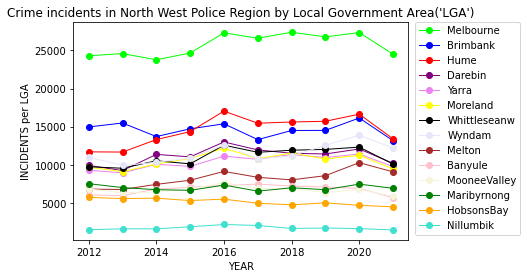

In [41]:
x = np.arange(2012,2022,1)

plt.plot(x,inMelbournenw, marker="o", color="lime", linewidth=1, label="Melbourne")
plt.plot(x,inBrimbanknw, marker="o", color="blue", linewidth=1, label="Brimbank")
plt.plot(x,inHumenw, marker="o", color="red", linewidth=1, label="Hume")
plt.plot(x,inDarebinnw, marker="o", color="purple", linewidth=1, label="Darebin")
plt.plot(x,inYarranw, marker="o", color="violet", linewidth=1, label="Yarra")
plt.plot(x,inMorelandnw, marker="o", color="yellow", linewidth=1, label="Moreland")
plt.plot(x,inWhittleseanw, marker="o", color="black", linewidth=1, label="Whittleseanw")
plt.plot(x,inWyndhamnw, marker="o", color="lavender", linewidth=1, label="Wyndam")
plt.plot(x,inMeltonnw, marker="o", color="brown", linewidth=1, label="Melton")
plt.plot(x,inBanyulenw, marker="o", color="pink", linewidth=1, label="Banyule")
plt.plot(x,inMooneeValleynw, marker="o", color="beige", linewidth=1, label="MooneeValley")
plt.plot(x,inMaribyrnongnw, marker="o", color="green", linewidth=1, label="Maribyrnong")
plt.plot(x,inHobsonsBaynw, marker="o", color="orange", linewidth=1, label="HobsonsBay")
plt.plot(x,inNillumbiknw, marker="o", color="turquoise", linewidth=1, label="Nillumbik")
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0.001))
plt.title("Crime incidents in North West Police Region by Local Government Area('LGA')")
plt.xlabel("YEAR")
plt.ylabel("INCIDENTS per LGA")
#plt.figure(figsize=(800,600))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

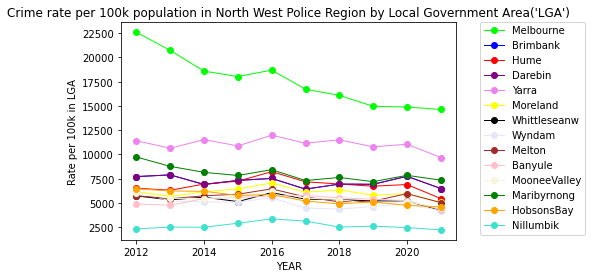

In [42]:
x = np.arange(2012,2022,1)

plt.plot(x,rateMelbournenw, marker="o", color="lime", linewidth=1, label="Melbourne")
plt.plot(x,rateBrimbanknw, marker="o", color="blue", linewidth=1, label="Brimbank")
plt.plot(x,rateHumenw, marker="o", color="red", linewidth=1, label="Hume")
plt.plot(x,rateDarebinnw, marker="o", color="purple", linewidth=1, label="Darebin")
plt.plot(x,rateYarranw, marker="o", color="violet", linewidth=1, label="Yarra")
plt.plot(x,rateMorelandnw, marker="o", color="yellow", linewidth=1, label="Moreland")
plt.plot(x,rateWhittleseanw, marker="o", color="black", linewidth=1, label="Whittleseanw")
plt.plot(x,rateWyndhamnw, marker="o", color="lavender", linewidth=1, label="Wyndam")
plt.plot(x,rateMeltonnw, marker="o", color="brown", linewidth=1, label="Melton")
plt.plot(x,rateBanyulenw, marker="o", color="pink", linewidth=1, label="Banyule")
plt.plot(x,rateMooneeValleynw, marker="o", color="beige", linewidth=1, label="MooneeValley")
plt.plot(x,rateMaribyrnongnw, marker="o", color="green", linewidth=1, label="Maribyrnong")
plt.plot(x,rateHobsonsBaynw, marker="o", color="orange", linewidth=1, label="HobsonsBay")
plt.plot(x,rateNillumbiknw, marker="o", color="turquoise", linewidth=1, label="Nillumbik")
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.001))
plt.title("Crime rate per 100k population in North West Police Region by Local Government Area('LGA')")
plt.xlabel("YEAR")
plt.ylabel("Rate per 100k in LGA")
#plt.figure(figsize=(800,600))
plt.show